In [13]:
from snowflake.snowpark.session import Session
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Create Session object
def create_session_object():
   connection_parameters = {
      "account": "xxxx.us-east-1",
      "user": "yyyy",
      "password": "zzzz",
      "role": "sysadmin",
      "warehouse": "compute_WH",
      "database": "snowflake_sample_data",
      "schema": "tpch_sf1"
   }
   session = Session.builder.configs(connection_parameters).create()
   print(session.sql('select current_warehouse(), current_database(), current_schema()').collect())
   return session

In [6]:
session = create_session_object()

[Row(CURRENT_WAREHOUSE()='COMPUTE_WH', CURRENT_DATABASE()='SNOWFLAKE_SAMPLE_DATA', CURRENT_SCHEMA()='TPCH_SF1')]


In [7]:
sql_running_total = """
select o_custkey, o_totalprice, o_orderdate, 
        sum(o_totalprice) over(partition by o_custkey order by o_orderdate asc) as running_total_by_customer
from orders
where o_custkey = '584' or o_custkey = '10180'
order by o_custkey, o_orderdate
limit 1000;
"""
running_total_pd_df = pd.DataFrame(session.sql(sql_running_total).collect())

In [8]:
running_total_pd_df.dtypes

O_CUSTKEY                     int64
O_TOTALPRICE                 object
O_ORDERDATE                  object
RUNNING_TOTAL_BY_CUSTOMER    object
dtype: object

In [9]:
running_total_pd_df['O_ORDERDATE'] = pd.to_datetime(running_total_pd_df['O_ORDERDATE'])
running_total_pd_df['O_CUSTKEY'] = running_total_pd_df['O_CUSTKEY'].astype("string")
running_total_pd_df['O_TOTALPRICE'] = running_total_pd_df['O_TOTALPRICE'].astype(float)
running_total_pd_df['RUNNING_TOTAL_BY_CUSTOMER'] = running_total_pd_df['RUNNING_TOTAL_BY_CUSTOMER'].astype(float)

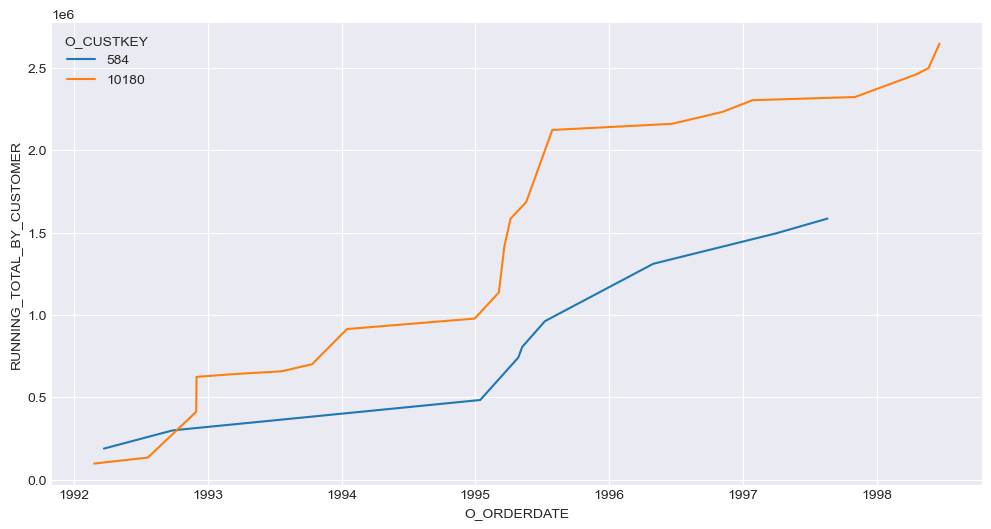

In [16]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8-darkgrid')
sns.lineplot(x=running_total_pd_df.O_ORDERDATE, 
            y=running_total_pd_df.RUNNING_TOTAL_BY_CUSTOMER, 
            hue=running_total_pd_df.O_CUSTKEY,
            data=running_total_pd_df)
plt.show()

In [114]:
running_total_pd_df.head(50)

,O_CUSTKEY,O_TOTALPRICE,O_ORDERDATE,RUNNING_TOTAL_BY_CUSTOMER
0,584,189289.67,1992-03-22,189289.67
1,584,110512.11,1992-09-26,299801.78
2,584,184194.62,1995-01-14,483996.40
3,584,257466.69,1995-04-28,741463.09
4,584,65176.34,1995-05-09,806639.43
5,584,156093.30,1995-07-10,962732.73
6,584,348101.04,1996-05-01,1310833.77
7,584,184920.38,1997-04-02,1495754.15
8,584,89434.71,1997-08-20,1585188.86
9,10180,98188.18,1992-02-24,98188.18
